In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installing Required Libraries

In [39]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz

# LIBRARIES

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.applications.vgg19 import VGG19
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
from tensorflow.keras.applications.vgg19 import preprocess_input
import visualkeras
from ann_visualizer.visualize import ann_viz
from keras import callbacks

# Reading the Dataset

In [41]:
train_path = "/content/drive/MyDrive/dataset/train/"
test_path = "/content/drive/MyDrive/dataset/test/"

df = pd.read_csv("/content/drive/MyDrive/dataset/class_dict.csv")

# Exploratory Data Analysis

In [42]:
df.head()

,class_index,class,height,width,scale by
0,0,AFRICAN CROWNED CRANE,224,224,1
1,1,AFRICAN FIREFINCH,224,224,1
2,2,ALBATROSS,224,224,1
3,3,ALEXANDRINE PARAKEET,224,224,1
4,4,AMERICAN AVOCET,224,224,1


In [43]:
classes = []
classes = df['class'].unique()
print(classes)

['AFRICAN CROWNED CRANE' 'AFRICAN FIREFINCH' 'ALBATROSS'
 'ALEXANDRINE PARAKEET' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN GOLDFINCH' 'AMERICAN KESTREL' 'AMERICAN PIPIT'
 'AMERICAN REDSTART' 'ANHINGA' 'ANNAS HUMMINGBIRD' 'ANTBIRD'
 'ARARIPE MANAKIN' 'ASIAN CRESTED IBIS' 'BALD EAGLE' 'BALD IBIS'
 'BALI STARLING' 'BALTIMORE ORIOLE' 'BANANAQUIT' 'BANDED BROADBILL'
 'BANDED PITA' 'BAR-TAILED GODWIT' 'BARN OWL' 'BARN SWALLOW'
 'BARRED PUFFBIRD' 'BAY-BREASTED WARBLER' 'BEARDED BARBET'
 'BEARDED BELLBIRD' 'BEARDED REEDLING' 'BELTED KINGFISHER'
 'BIRD OF PARADISE' 'BLACK & YELLOW bROADBILL' 'BLACK FRANCOLIN'
 'BLACK SKIMMER' 'BLACK SWAN' 'BLACK TAIL CRAKE' 'BLACK THROATED BUSHTIT'
 'BLACK THROATED WARBLER' 'BLACK VULTURE' 'BLACK-CAPPED CHICKADEE'
 'BLACK-NECKED GREBE' 'BLACK-THROATED SPARROW' 'BLACKBURNIAM WARBLER'
 'BLONDE CRESTED WOODPECKER' 'BLUE GROUSE' 'BLUE HERON' 'BOBOLINK'
 'BORNEAN BRISTLEHEAD' 'BORNEAN LEAFBIRD' 'BORNEAN PHEASANT'
 'BROWN CREPPER' 'BROWN NOODY' 

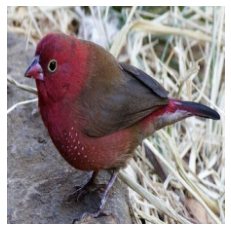

In [44]:
img = load_img(train_path + "AFRICAN FIREFINCH/008.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [45]:
x = img_to_array(img)

print(x.shape) # (224, 224, 3)

numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

(224, 224, 3)
Number of Class:  300


# Data Augmentation

In [46]:
train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical')


#Creating generator for Test DataSet
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 43622 images belonging to 300 classes.
Found 1500 images belonging to 300 classes.


# Visualize of the Data Augmentation (Sample Images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


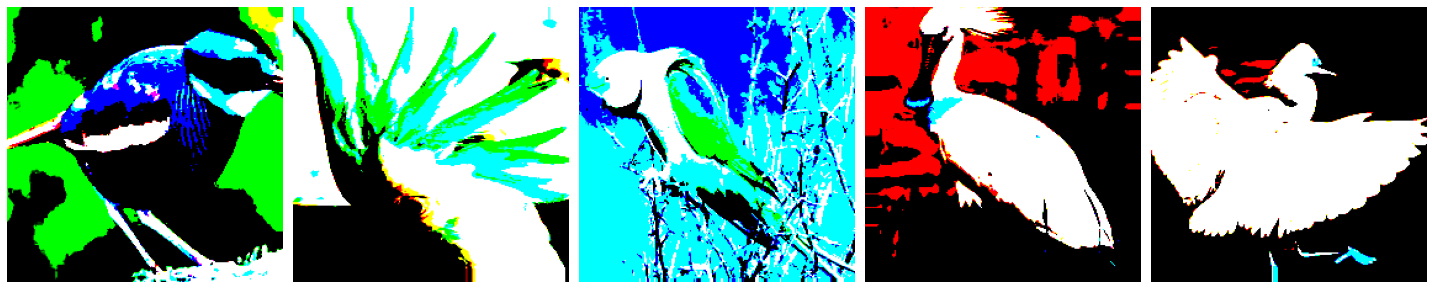

In [47]:
sample_training_images, _ = next(train_generator)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

# Building VGG19

In [48]:
vgg = VGG19()
print(vgg.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [49]:
print(type(vgg))


vgg_layer_list = vgg.layers
print(vgg_layer_list)

model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])


print(model.summary())

<class 'keras.engine.functional.Functional'>
[<keras.engine.input_layer.InputLayer object at 0x7f3356f46090>, <keras.layers.convolutional.Conv2D object at 0x7f3356f16490>, <keras.layers.convolutional.Conv2D object at 0x7f3356f161d0>, <keras.layers.pooling.MaxPooling2D object at 0x7f3356f379d0>, <keras.layers.convolutional.Conv2D object at 0x7f3357371310>, <keras.layers.convolutional.Conv2D object at 0x7f3356fed050>, <keras.layers.pooling.MaxPooling2D object at 0x7f3356f16450>, <keras.layers.convolutional.Conv2D object at 0x7f3356fa05d0>, <keras.layers.convolutional.Conv2D object at 0x7f3356fa3f50>, <keras.layers.convolutional.Conv2D object at 0x7f3356f16050>, <keras.layers.convolutional.Conv2D object at 0x7f3356fb74d0>, <keras.layers.pooling.MaxPooling2D object at 0x7f3356f3d950>, <keras.layers.convolutional.Conv2D object at 0x7f3356f4af90>, <keras.layers.convolutional.Conv2D object at 0x7f3356f3f550>, <keras.layers.convolutional.Conv2D object at 0x7f3356f43e50>, <keras.layers.convolut

In [50]:
for layers in model.layers:
    layers.trainable = False 
    
model.add(Dense(numberOfClass,activation="softmax"))

print(model.summary())


model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"]
              )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Visualize of Our Model Layers

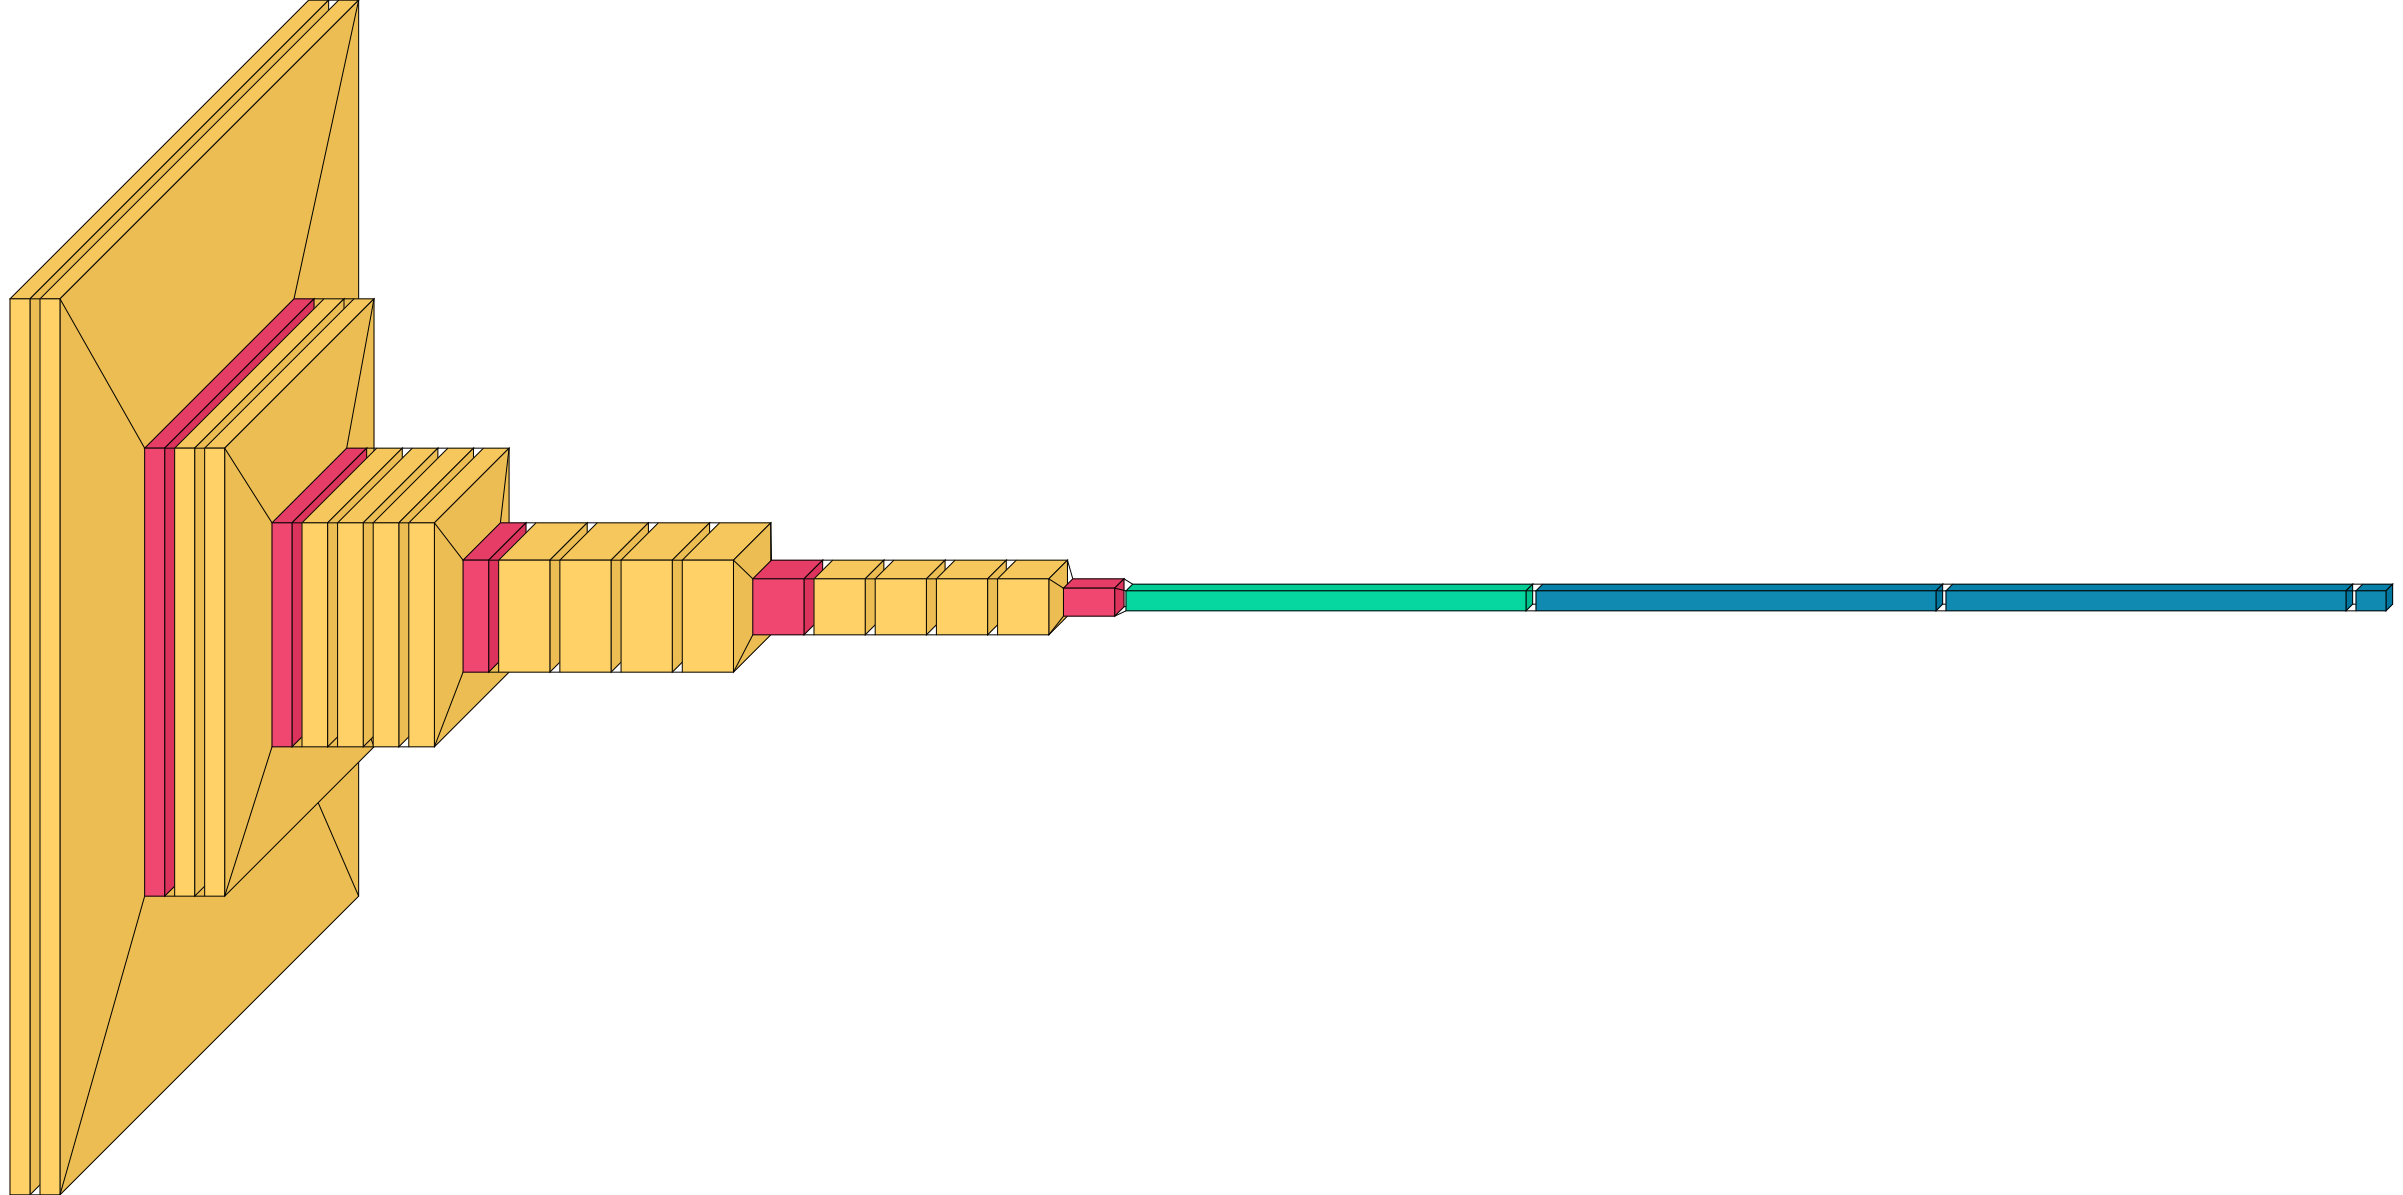

In [53]:
visualkeras.layered_view(model)

# Visualize of Neural Networks

In [52]:
ann_viz(model, title="Neural Networks")

# Training the Model

In [54]:
batch_size = 32
hist = model.fit_generator(train_generator,
                           steps_per_epoch=4800//batch_size,
                           epochs = 50,
                           validation_data=test_generator,
                           validation_steps=800//batch_size
                           )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
150/150 [==============================] - 115s 761ms/step - loss: 2.1463 - accuracy: 0.5595 - val_loss: 0.7503 - val_accuracy: 0.7937
Epoch 2/50
150/150 [==============================] - 113s 754ms/step - loss: 1.0073 - accuracy: 0.7568 - val_loss: 0.3999 - val_accuracy: 0.8788
Epoch 3/50
150/150 [==============================] - 113s 755ms/step - loss: 0.8219 - accuracy: 0.8061 - val_loss: 0.4429 - val_accuracy: 0.8775
Epoch 4/50
150/150 [==============================] - 113s 751ms/step - loss: 0.7746 - accuracy: 0.8310 - val_loss: 0.4771 - val_accuracy: 0.8800
Epoch 5/50
150/150 [==============================] - 113s 752ms/step - loss: 0.6678 - accuracy: 0.8502 - val_loss: 0.3075 - val_accuracy: 0.9150
Epoch 6/50
150/150 [==============================] - 113s 753ms/step - loss: 0.6820 - accuracy: 0.8591 - val_loss: 0.4010 - val_accuracy: 0.9013
Epoch 7/50
150/150 [==============================] - 113s 751ms/step - loss: 0.5762 - accuracy: 0.8746 - val_loss: 0.2747 -

# Accuracy of the Model

In [55]:
results = model.evaluate(test_generator)

47/47 [==============================] - 5s 111ms/step - loss: 0.2471 - accuracy: 0.9507


# Save Model

In [56]:
model.save("VGG19ClassificationModel.h5")

# Visualization

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


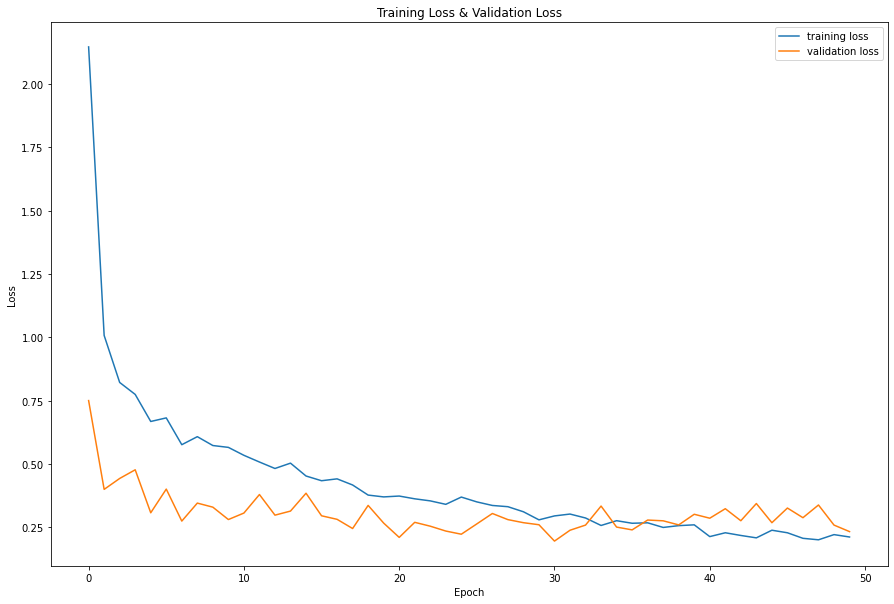

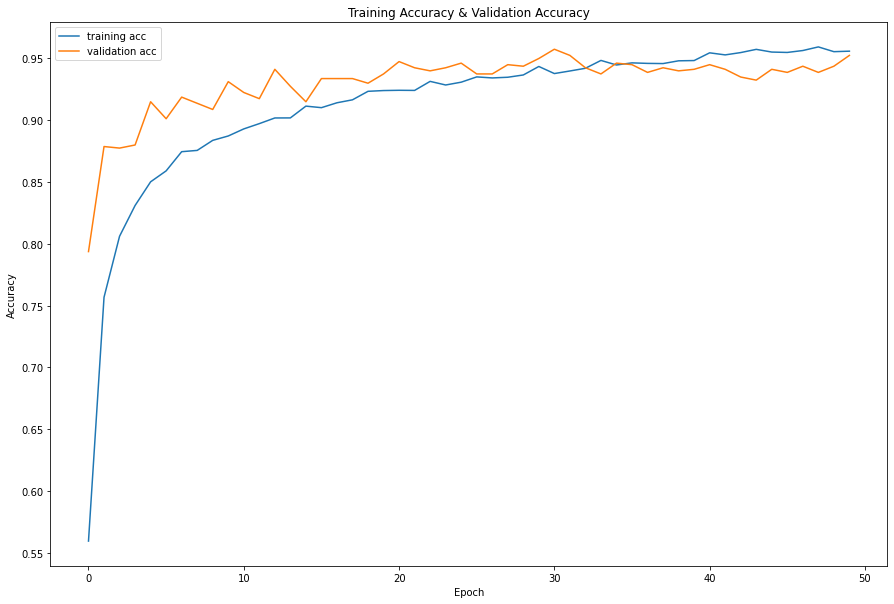

In [57]:
print(hist.history.keys())
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Prediction Operation

[295]
WILSONS BIRD OF PARADISE


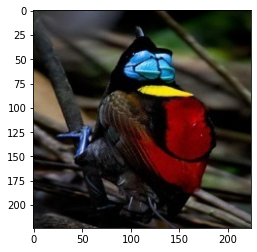

In [61]:
from tensorflow.keras.preprocessing import image
import numpy as np
image_path = "/content/drive/My Drive/dataset/train/WILSONS BIRD OF PARADISE/016.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
 
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)